#### Importing Python Packages and Environment Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.ensemble import RandomForestClassifier

In [4]:
%matplotlib inline

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


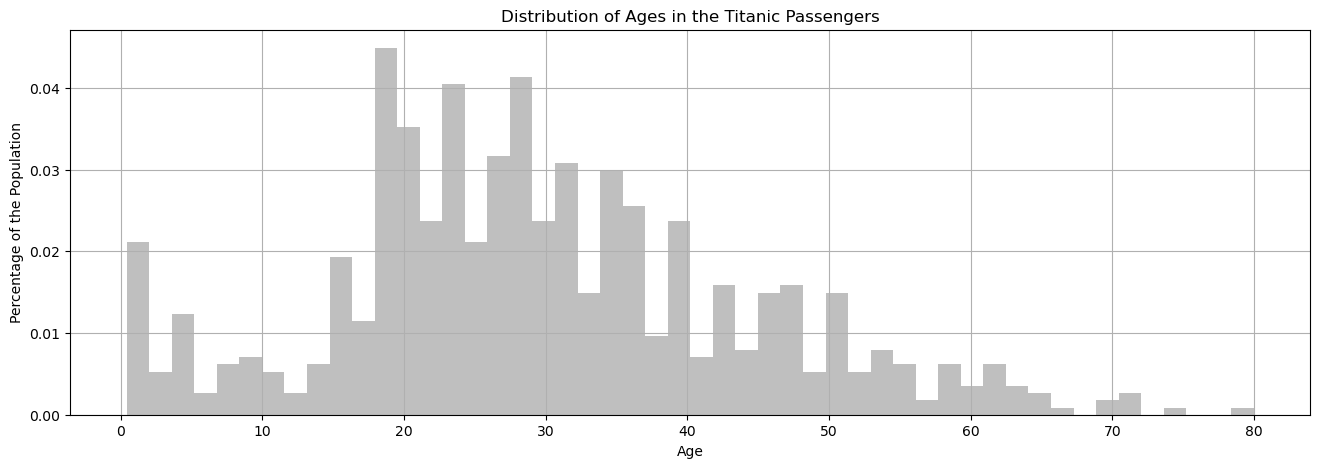

In [10]:
# Using Matplotlib
ages = train['Age'].dropna().tolist()

plt.figure(figsize=(16, 5))
plt.hist(ages, histtype='bar', bins=50, color='gray', 
            alpha=0.5, density=True)
plt.xlabel('Age')
plt.ylabel('Percentage of the Population')
plt.title('Distribution of Ages in the Titanic Passengers')
plt.grid(True)
plt.show()

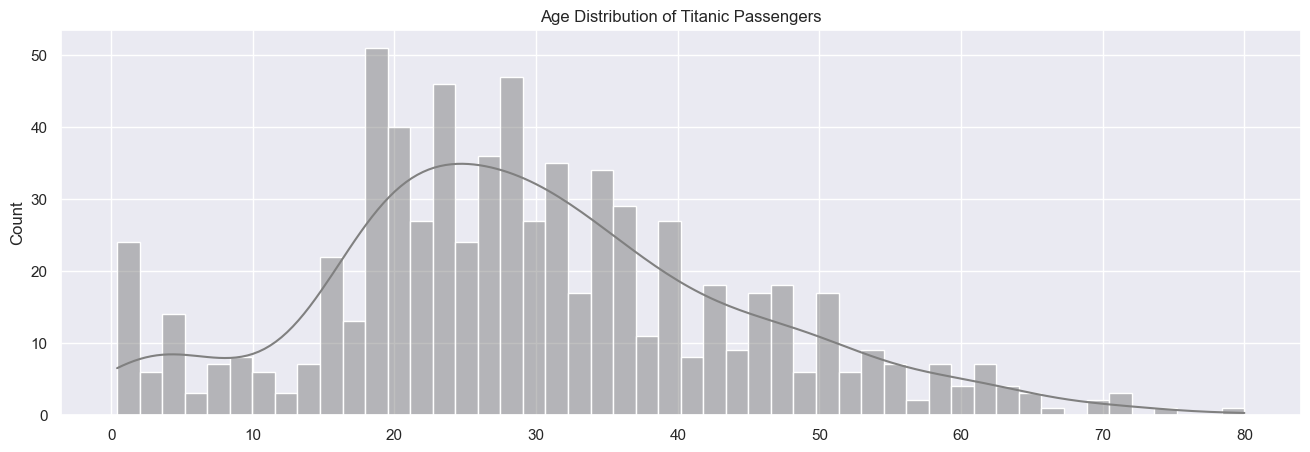

In [21]:
# Using Seaborn
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(16, 5)})


g = sns.histplot(ages, bins=50, color='gray', kde=True)
g.set_title("Age Distribution of Titanic Passengers")
plt.show()

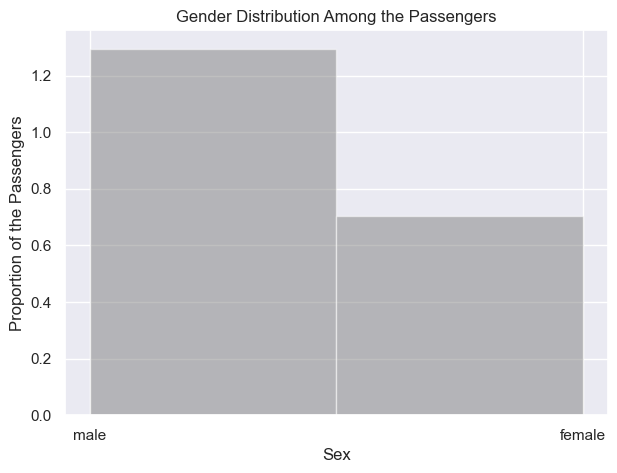

In [ ]:
# Gender Distribution Among the Passengers
# Matplotlib

sex = train.loc[:, 'Sex'].dropna().tolist()
plt.figure(figsize=(7, 5))
plt.hist(sex, histtype='bar',bins=2, color='gray', alpha=0.5, density=True)
plt.xlabel('Sex')
plt.ylabel('Proportion of the Passengers')
plt.title('Gender Distribution Among the Passengers')
plt.grid(True)
plt.show()

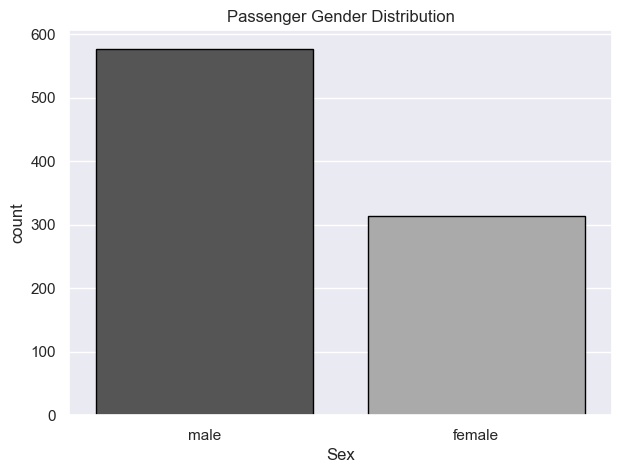

In [28]:
# Seaborn
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(7, 5)})

g = sns.countplot(x='Sex', data=train, hue='Sex', palette='gray', edgecolor='black', legend=False)
g.set_title('Passenger Gender Distribution')
plt.show()

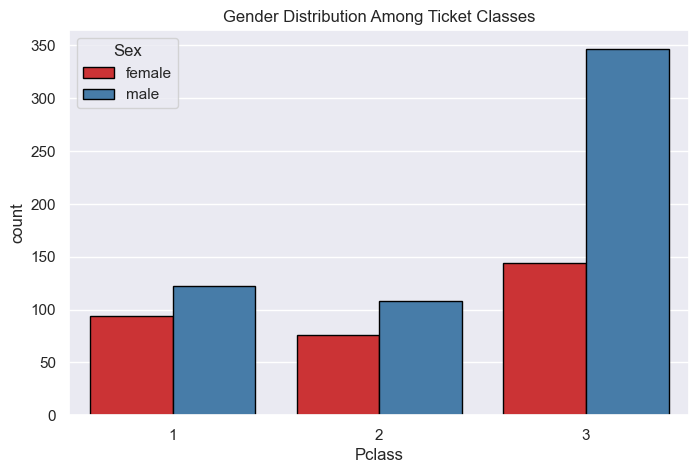

In [30]:
# Gender Distribution Among Ticket Classes
# Seaborn

sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(8, 5)})

g= sns.countplot(x='Pclass', data=train, hue='Sex', palette='Set1', edgecolor='black')
g.set_title('Gender Distribution Among Ticket Classes')
plt.show()

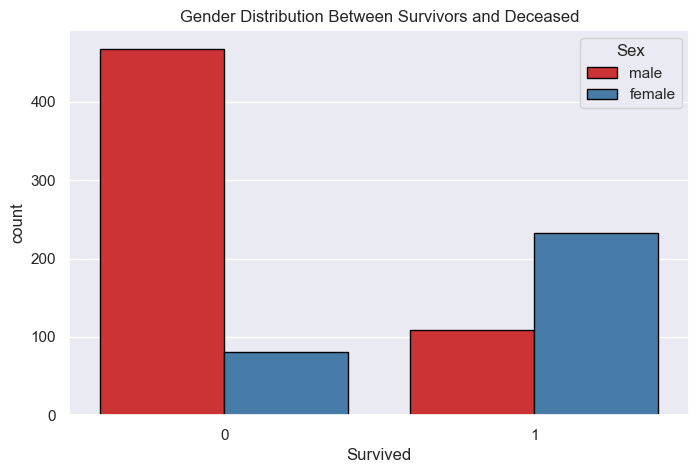

In [31]:
# Gender Distribution Between Survivors and Deceased
# Seaborn

sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(8, 5)})
g = sns.countplot(x='Survived', data=train, hue='Sex', palette='Set1', edgecolor='black')
g.set_title('Gender Distribution Between Survivors and Deceased')
plt.show()

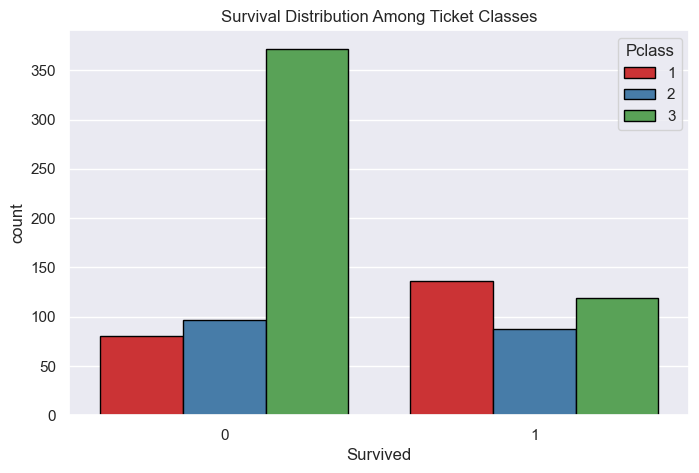

In [32]:
# Survival Distribution Among Ticket Classes
# Seaborn

sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(8, 5)})
g = sns.countplot(x='Survived', data=train, hue='Pclass', palette='Set1', edgecolor='black')
g.set_title('Survival Distribution Among Ticket Classes')
plt.show()

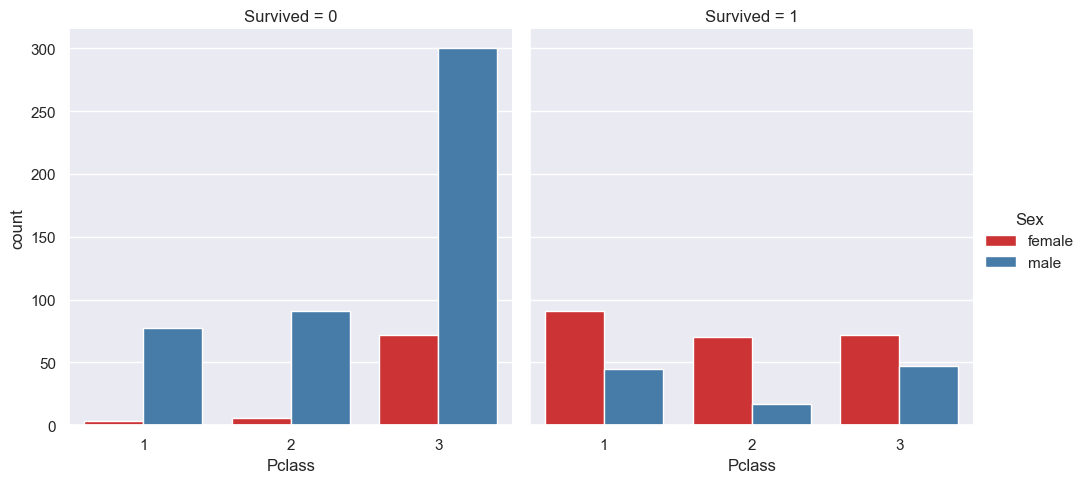

In [39]:
# Passanger Survival with respect to Gender and Ticket Class
# Seaborn

sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(12, 5)})
g = sns.catplot(x="Pclass", col="Survived", hue="Sex", data=train, kind="count", palette="Set1")
g.set_titles("Survived = {col_name}")
plt.show()

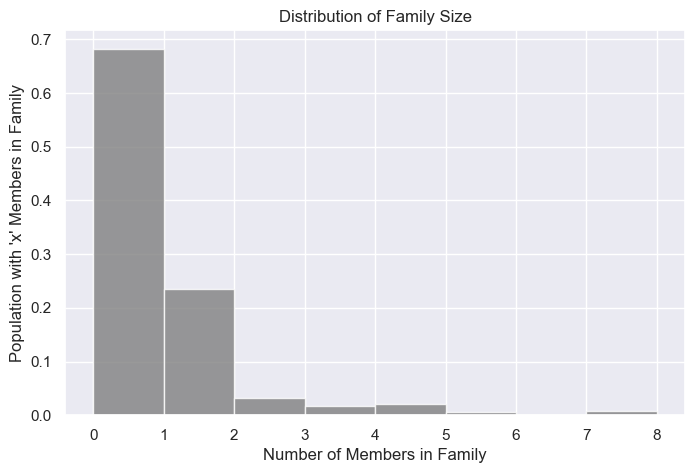

In [43]:
# Distribution of Family Size
# Matplotlib

Sibship = train['SibSp'].dropna().tolist()
plt.figure(figsize=(8, 5))
plt.hist(Sibship, histtype='bar', bins=8, color='gray', alpha=0.8, density=True)
plt.xlabel('Number of Members in Family')
plt.ylabel('Population with \'x\' Members in Family')
plt.title('Distribution of Family Size')
plt.grid(True)
plt.show()

In [ ]:
# Distribution of Family Size
# Seaborn

sns.set(style='darkgrid')
sns.set(rc={''})
plt.show()